In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Charger les jeux de données
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')


# Display the first few rows of train and test datasets
display(train_df.head())
display(test_df.head())

# Check for missing values and data types
print("Training Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())

# Check for missing values
print("\nMissing values in train data:")
print(train_df.isnull().sum())

print("\nMissing values in test data:")
print(test_df.isnull().sum())


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15713774.0,Hsieh,683.0,Germany,Male,49.0,7.0,123837.86,2.0,1.0,1.0,138700.75,1.0
1,1,15682533.0,Hs?eh,608.0,France,Female,30.0,10.0,0.00,2.0,1.0,1.0,146723.72,0.0
2,2,15791550.0,Tsou,539.0,France,Female,32.0,8.0,0.00,1.0,1.0,1.0,94873.60,0.0
3,3,15762762.0,Chiawuotu,530.0,Spain,Female,39.0,8.0,0.00,2.0,0.0,0.0,177896.93,0.0
4,4,15756475.0,Nnamdi,613.0,France,Female,45.0,10.0,0.00,2.0,1.0,1.0,116748.14,0.0


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15797736.0,Chikwendu,591.0,Germany,Female,32.0,2.0,106881.50,2.0,1.0,0.0,122810.53
1,15001,15676515.0,Lai,553.0,Spain,Male,37.0,2.0,0.00,2.0,1.0,0.0,63736.17
2,15002,15701291.0,Folliero,646.0,France,Female,29.0,7.0,0.00,2.0,1.0,0.0,121866.87
3,15003,15594812.0,Trevisani,603.0,Germany,Male,49.0,8.0,131394.56,1.0,0.0,1.0,147059.28
4,15004,15791321.0,Ch'ien,645.0,Spain,Female,39.0,3.0,0.00,2.0,1.0,0.0,129975.94


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [73]:
# Summary statistics of numerical columns
print("\nStatistical summary of train data:")
display(train_df.describe())

print("\nStatistical summary of test data:")
display(test_df.describe())



Statistical summary of train data:


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.570073e+07,658.701800,37.660800,5.038800,42888.826095,1.589467,0.779800,0.497867,117892.175400,0.199333
std,4330.271354,1.162730e+06,80.238346,8.106408,2.810354,59695.877791,0.532430,0.414395,0.500012,45574.462515,0.399512
min,0.000000,1.557151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563387e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82870.750000,0.000000
50%,7499.500000,1.569018e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123583.850000,0.000000
75%,11249.250000,1.575972e+07,709.000000,42.000000,7.000000,109844.810000,2.000000,1.000000,1.000000,157567.370000,0.000000
max,14999.000000,1.562648e+08,4818.000000,72.000000,10.000000,207034.960000,6.000000,1.000000,1.000000,199761.290000,1.000000



Statistical summary of test data:


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.00000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,19999.50000,1.569185e+07,658.34280,37.713000,5.080700,42988.997215,1.590800,0.785500,0.491100,1.197376e+05
std,2886.89568,7.141705e+04,73.15434,8.185764,2.793522,59821.063569,0.528378,0.410496,0.499946,2.003755e+05
min,15000.00000,1.556581e+07,431.00000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.781900e+02
25%,17499.75000,1.563365e+07,599.00000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,8.260242e+04
50%,19999.50000,1.568933e+07,661.00000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,1.224355e+05
75%,22499.25000,1.575754e+07,709.00000,42.000000,8.000000,109766.095000,2.000000,1.000000,1.000000,1.575560e+05
max,24999.00000,1.581564e+07,850.00000,74.000000,10.000000,186825.570000,4.000000,1.000000,1.000000,1.868432e+07


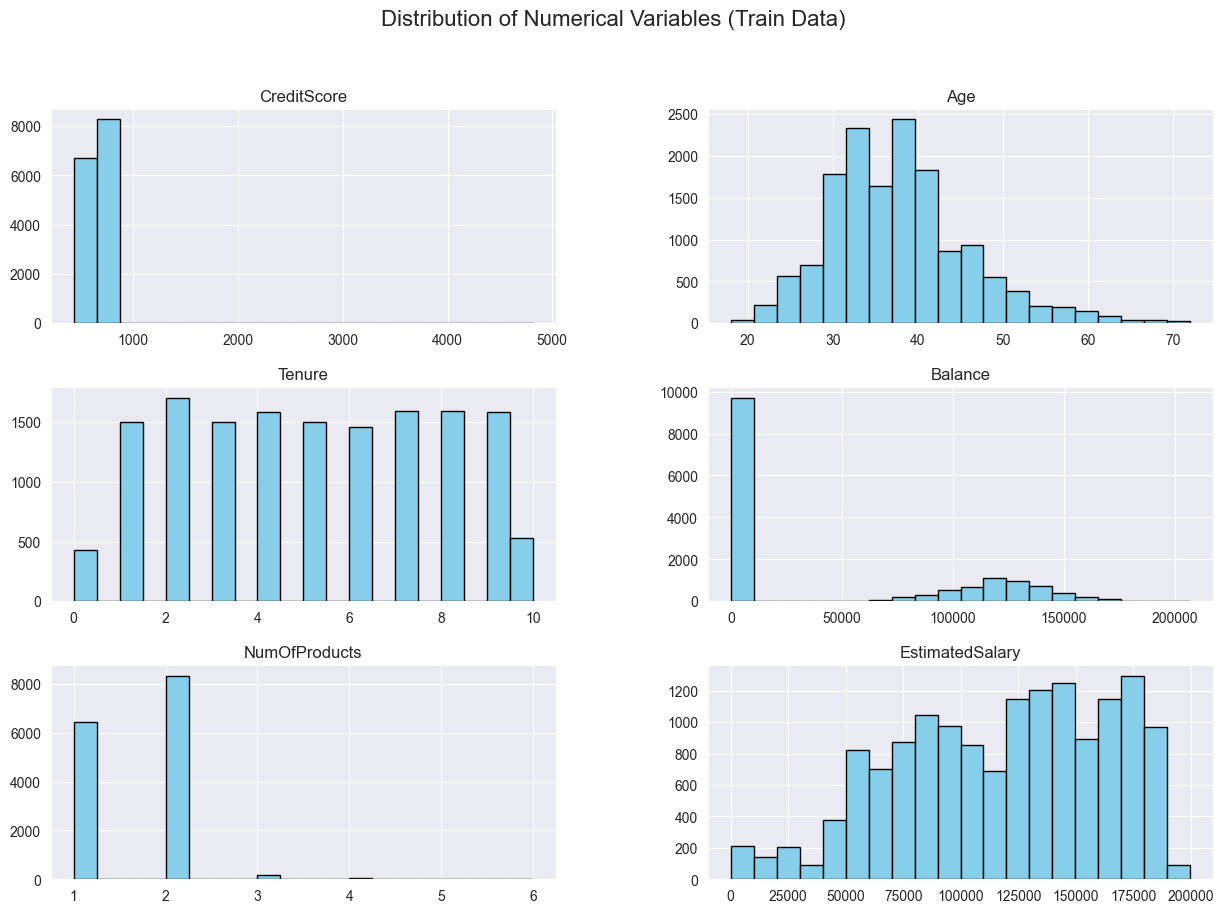

In [74]:
# Plot histograms of numerical variables
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
train_df[numerical_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables (Train Data)", fontsize=16)
plt.show()


C:\Users\dumas\AppData\Local\Temp\ipykernel_2944\2197780533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, ax=axes[i//2, i%2], palette='viridis')
C:\Users\dumas\AppData\Local\Temp\ipykernel_2944\2197780533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, ax=axes[i//2, i%2], palette='viridis')
C:\Users\dumas\AppData\Local\Temp\ipykernel_2944\2197780533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, ax=axes[i//2, i%2], palette='viridis')
C:\Users\dumas\AppData

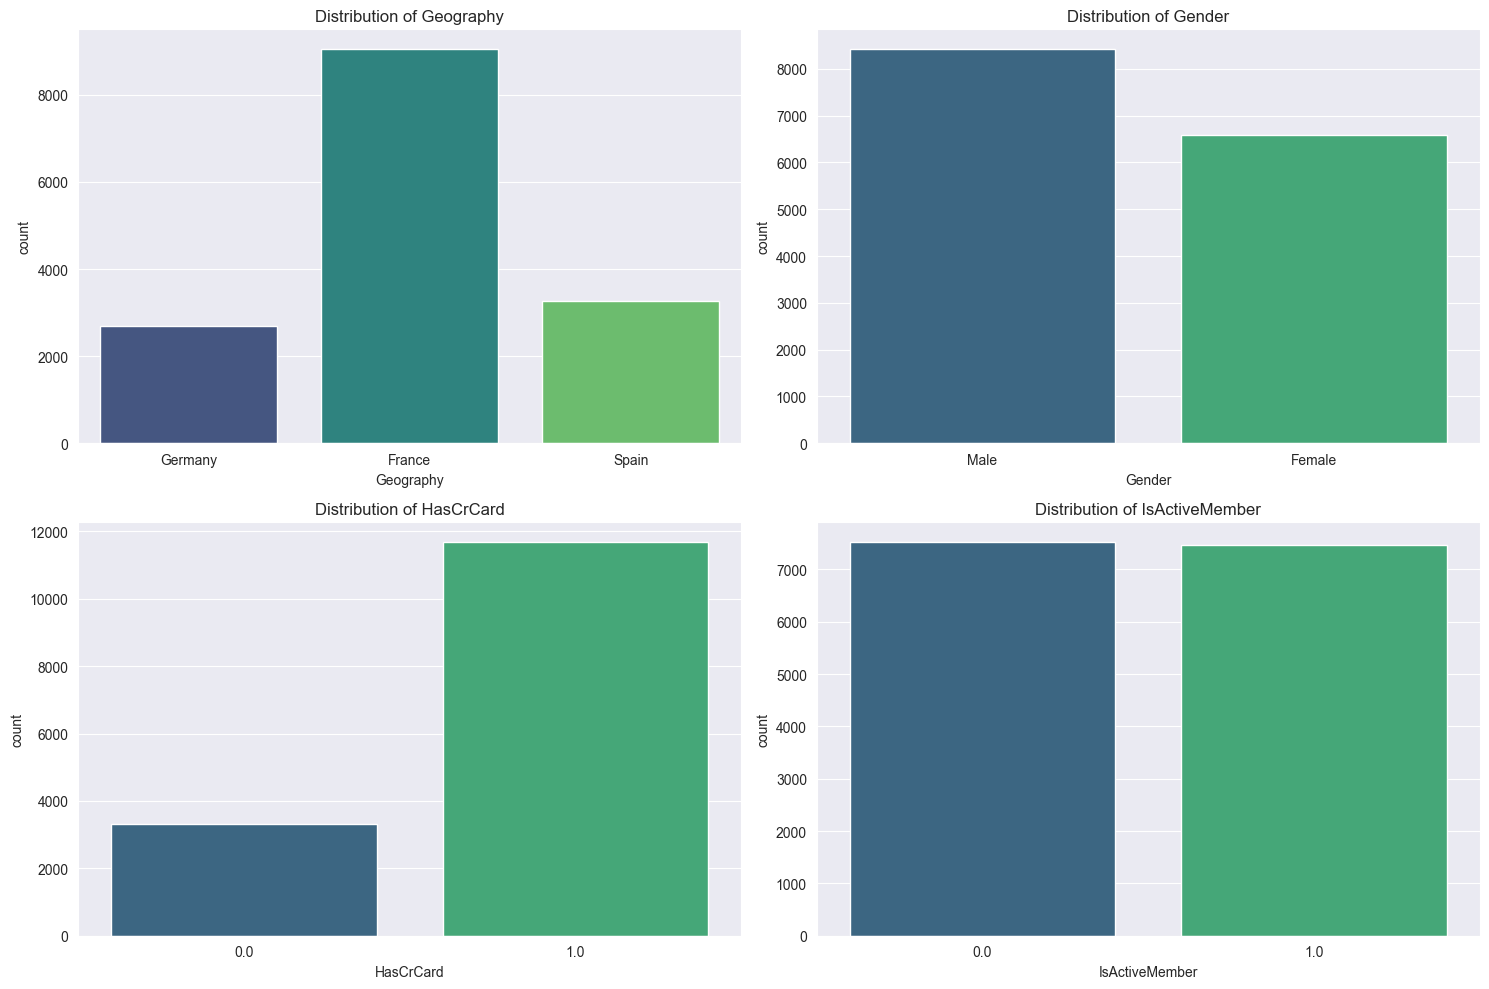

In [75]:
# Countplots for categorical variables
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=train_df, x=col, ax=axes[i//2, i%2], palette='viridis')
    axes[i//2, i%2].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()



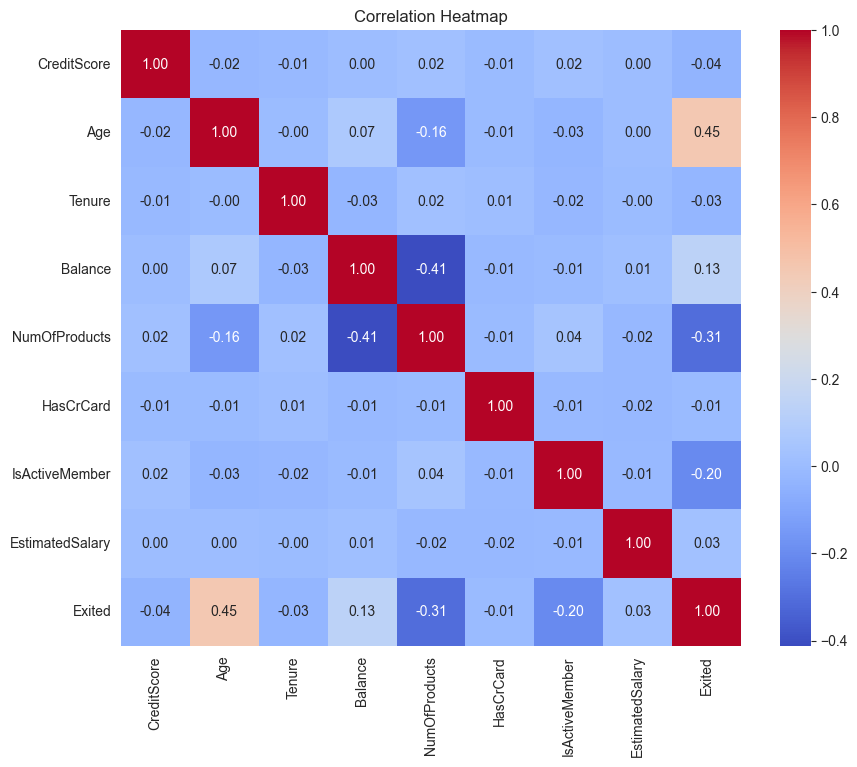

In [76]:
# Select only numerical columns for the correlation matrix
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop(['id', 'CustomerId'], errors='ignore')
# Compute the correlation matrix
correlation_matrix = train_df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

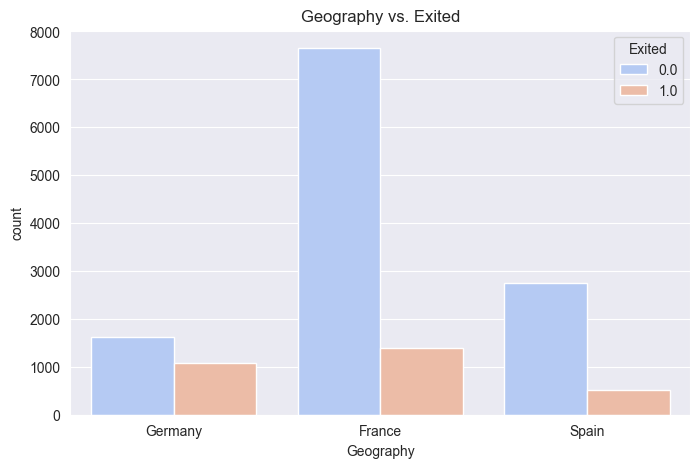

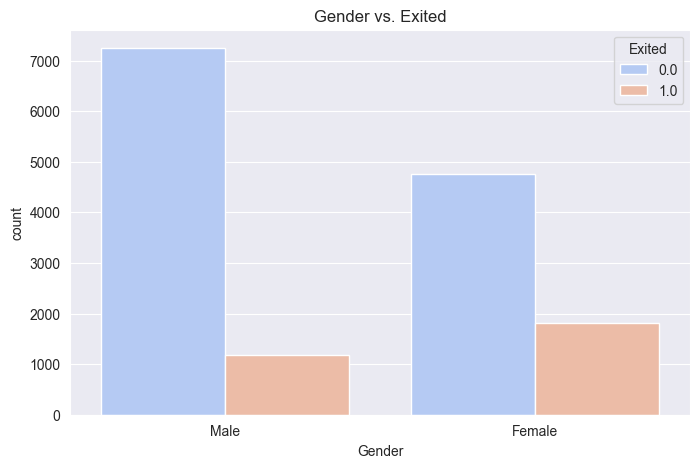

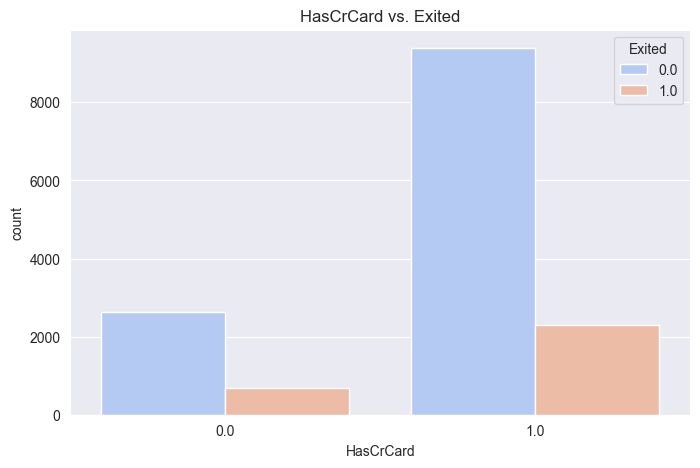

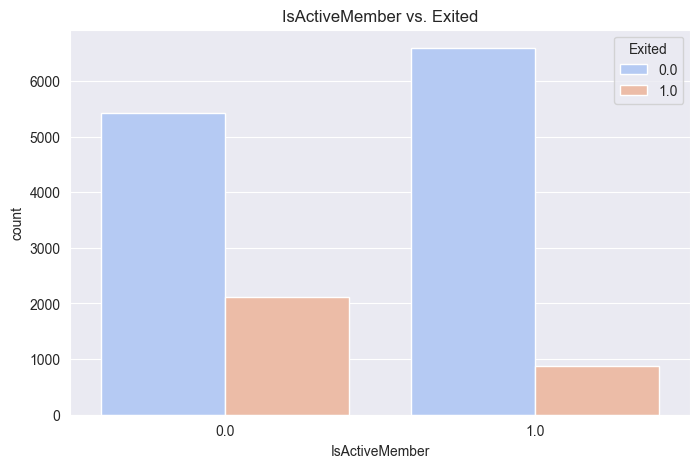

In [77]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x=col, hue='Exited', palette='coolwarm')
    plt.title(f"{col} vs. Exited")
    plt.show()

In [78]:

# Prétraitement des données
train_df = train_df.drop(columns=['Surname', 'CustomerId'])
test_df = test_df.drop(columns=['Surname', 'CustomerId'])

train_df = pd.get_dummies(train_df, columns=['Geography', 'Gender'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Geography', 'Gender'], drop_first=True)

# Nouvelle feature : client inactif avec solde élevé
train_df['Inactive_high_balance'] = ((train_df['Balance'] > 100000) & (train_df['IsActiveMember'] == 0)).astype(int)
test_df['Inactive_high_balance'] = ((test_df['Balance'] > 100000) & (test_df['IsActiveMember'] == 0)).astype(int)

# Création de nouvelles variables pour maximiser l'AUC
train_df['Age * Balance'] = train_df['Age'] * train_df['Balance']
test_df['Age * Balance'] = test_df['Age'] * test_df['Balance']

train_df['Tenure * NumOfProducts'] = train_df['Tenure'] * train_df['NumOfProducts']
test_df['Tenure * NumOfProducts'] = test_df['Tenure'] * test_df['NumOfProducts']

train_df['NumOfProducts * IsActiveMember'] = train_df['NumOfProducts'] * train_df['IsActiveMember']
test_df['NumOfProducts * IsActiveMember'] = test_df['NumOfProducts'] * test_df['IsActiveMember']

train_df['Balance / EstimatedSalary'] = train_df['Balance'] / train_df['EstimatedSalary']
test_df['Balance / EstimatedSalary'] = test_df['Balance'] / test_df['EstimatedSalary']

# Log transformations for skewed features
train_df['Log_Balance'] = np.log1p(train_df['Balance'])
test_df['Log_Balance'] = np.log1p(test_df['Balance'])

train_df['Log_EstimatedSalary'] = np.log1p(train_df['EstimatedSalary'])
test_df['Log_EstimatedSalary'] = np.log1p(test_df['EstimatedSalary'])

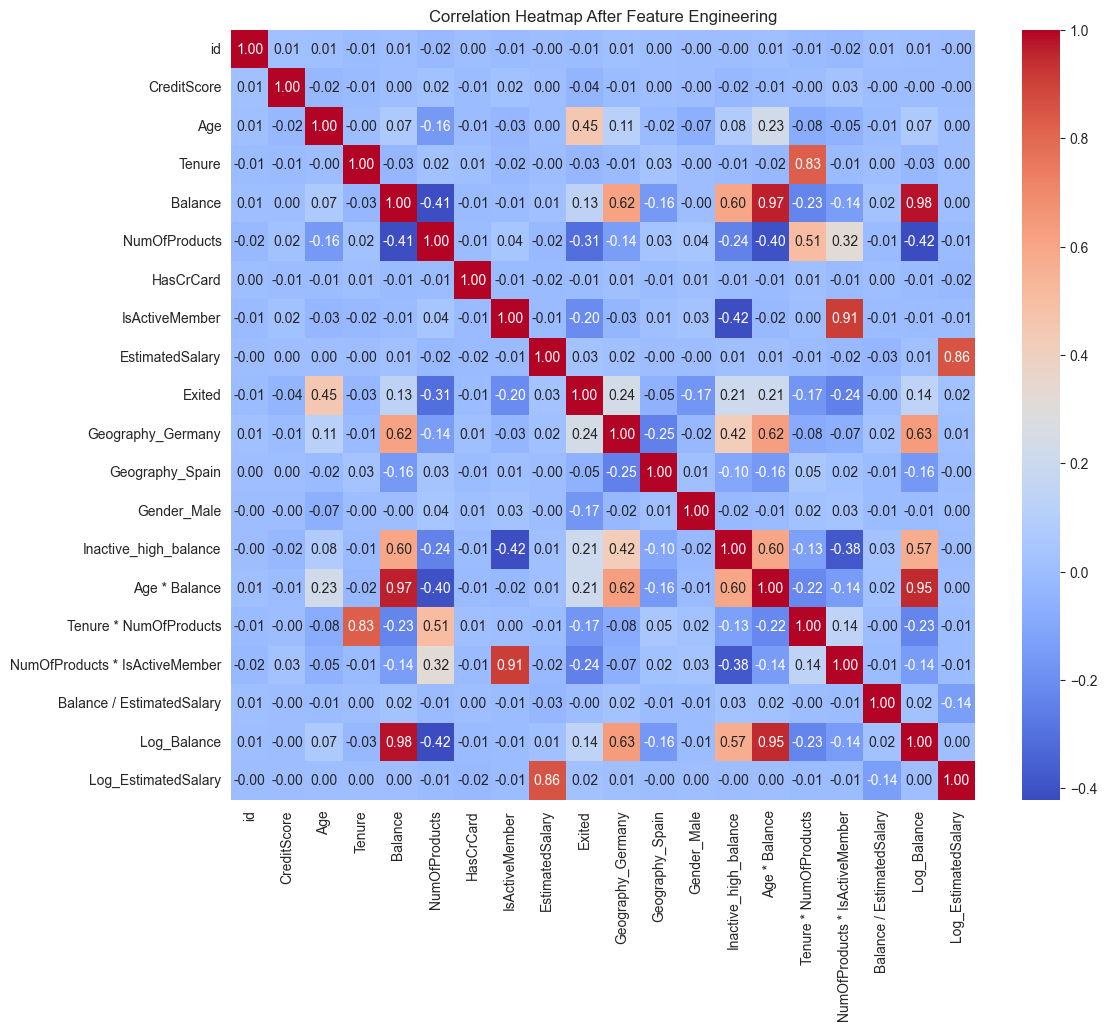

In [79]:
# Recompute correlation matrix
correlation_matrix = train_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap After Feature Engineering")
plt.show()

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sélectionner uniquement les colonnes numériques et exclure la variable cible
X = train_df.select_dtypes(include=[np.number]).drop(columns=['Exited'])

# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print("Variance Inflation Factor (VIF) pour chaque variable :")
print(vif_data.sort_values(by='VIF', ascending=False))


Variance Inflation Factor (VIF) pour chaque variable :
                           Feature         VIF
15             Log_EstimatedSalary  199.122440
4                          Balance   71.616954
1                      CreditScore   64.181196
5                    NumOfProducts   51.960744
11          Tenure * NumOfProducts   41.572138
3                           Tenure   40.562627
14                     Log_Balance   38.403877
2                              Age   35.834508
10                   Age * Balance   35.076149
7                   IsActiveMember   26.024792
12  NumOfProducts * IsActiveMember   23.026202
8                  EstimatedSalary   12.995879
6                        HasCrCard    4.524925
0                               id    3.992049
9            Inactive_high_balance    2.891283
13       Balance / EstimatedSalary    1.009015


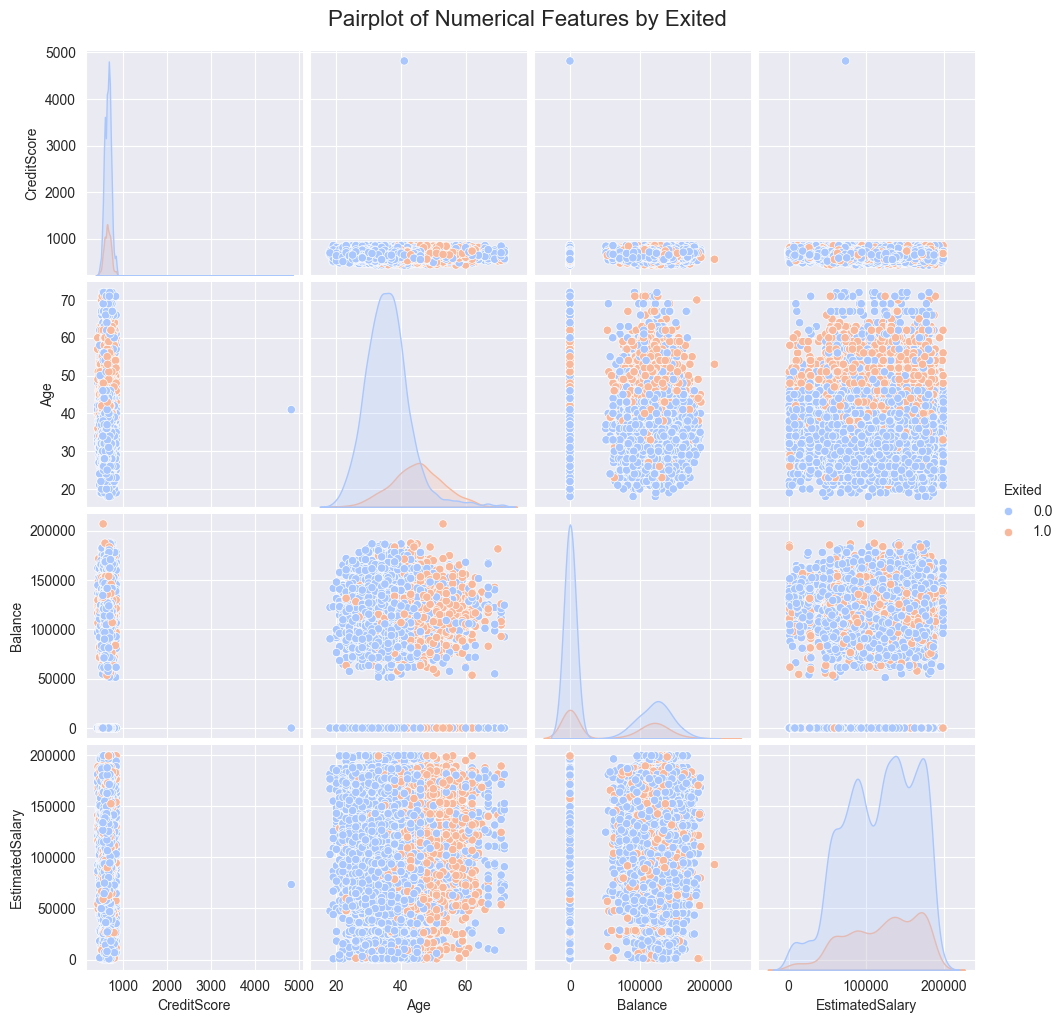

In [81]:
# Pairplot pour les principales variables
sns.pairplot(train_df, vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], hue='Exited', palette='coolwarm')
plt.suptitle("Pairplot of Numerical Features by Exited", y=1.02, fontsize=16)
plt.show()

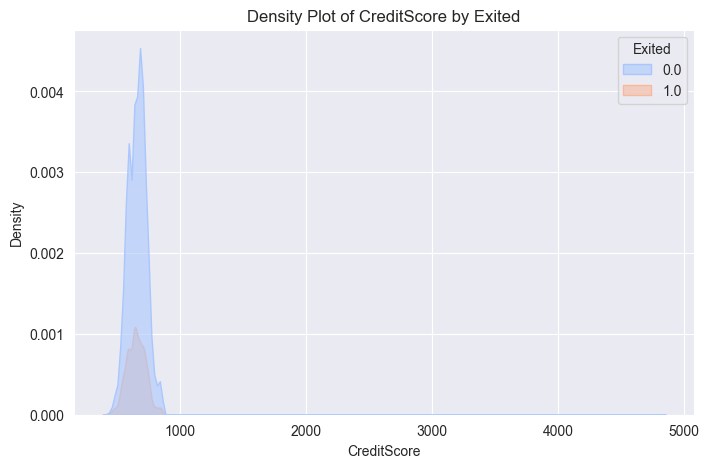

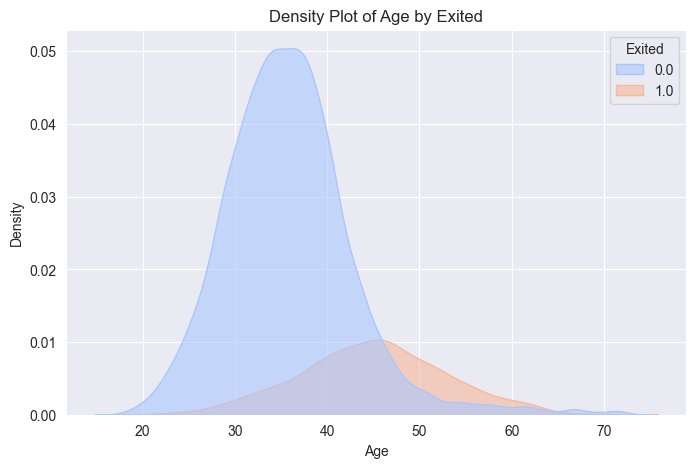

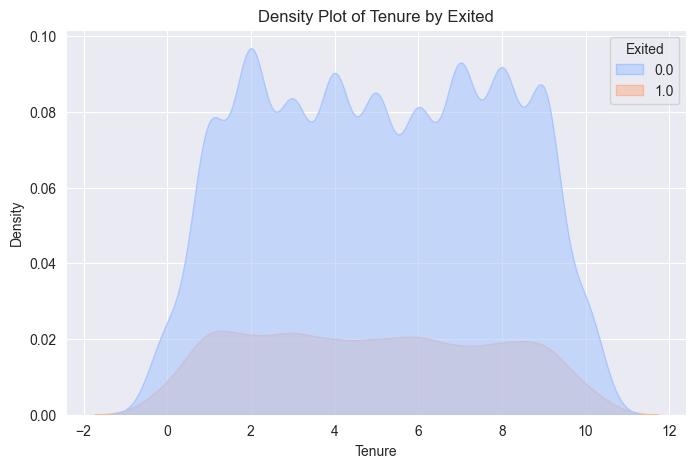

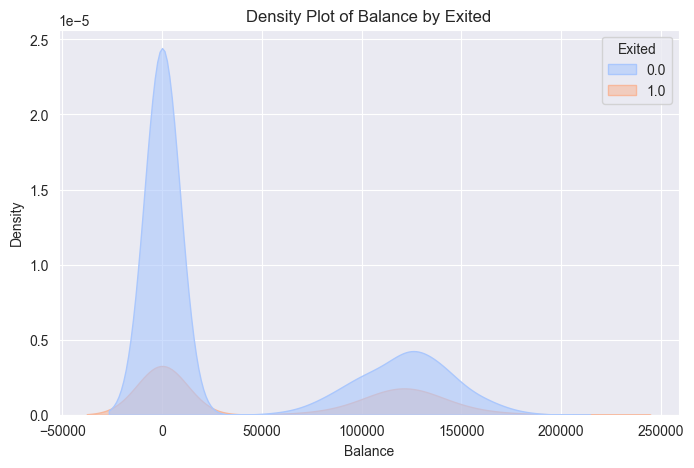

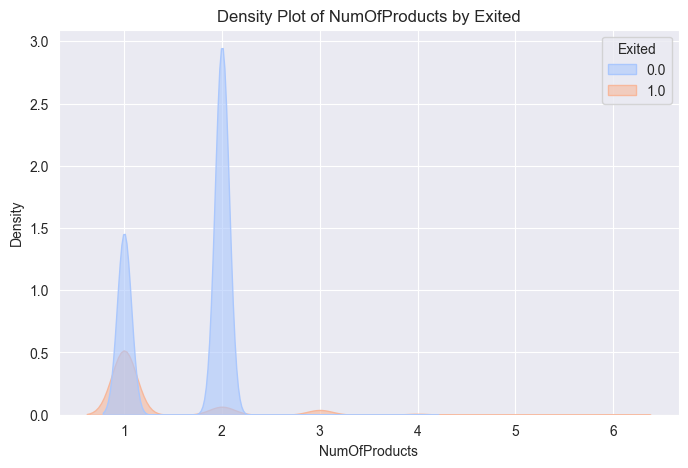

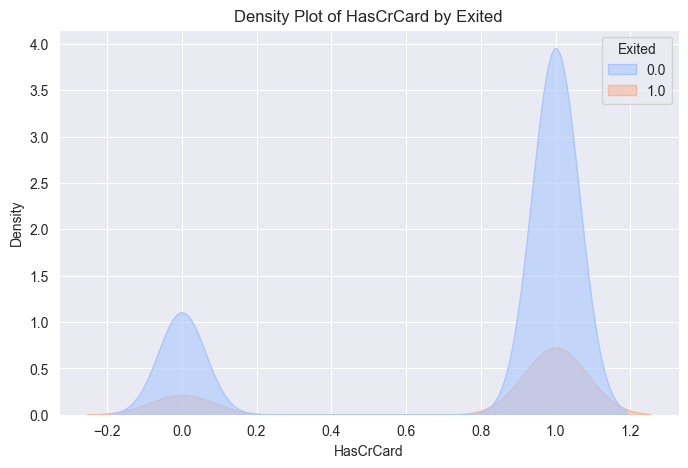

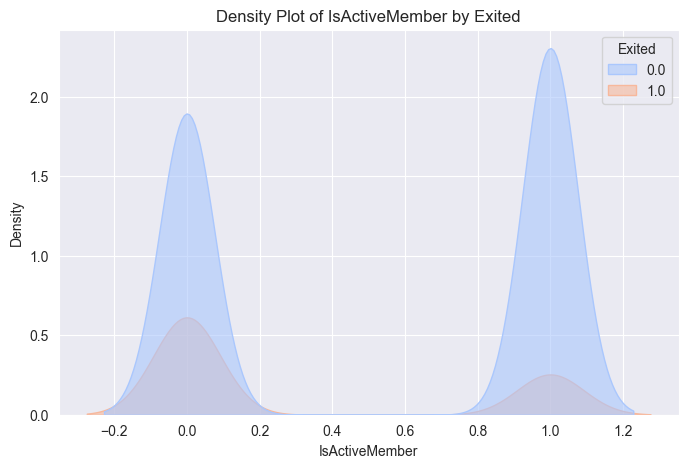

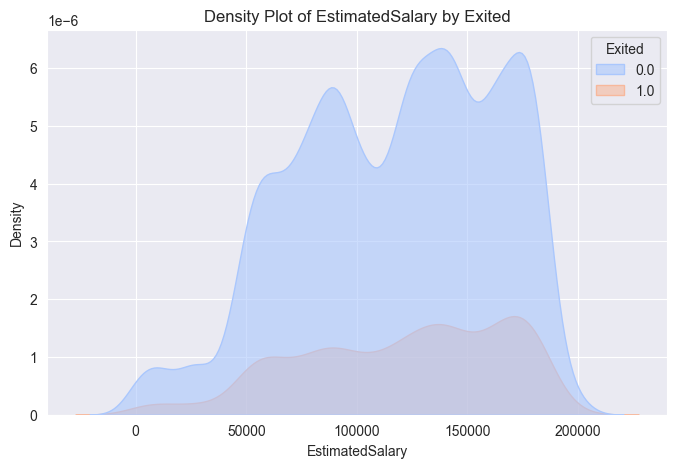

In [82]:
for col in numerical_cols:
    if col == 'Exited':  # Sauter la colonne Exited
        continue
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=train_df, x=col, hue='Exited', fill=True, palette='coolwarm', alpha=0.6)
    plt.title(f"Density Plot of {col} by Exited")
    plt.show()

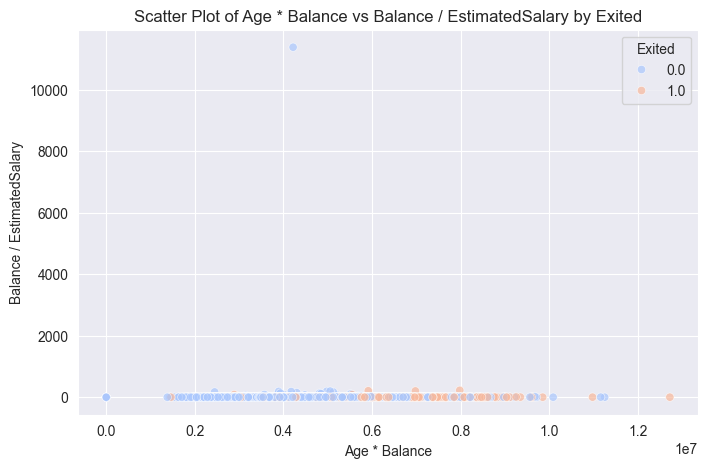

In [83]:
# Scatter plot pour des variables combinées
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='Age * Balance', y='Balance / EstimatedSalary', hue='Exited', palette='coolwarm', alpha=0.7)
plt.title("Scatter Plot of Age * Balance vs Balance / EstimatedSalary by Exited")
plt.show()


In [84]:
# Charger les jeux de données
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Prétraitement des données
train_df = train_df.drop(columns=['Surname', 'CustomerId'])
test_df = test_df.drop(columns=['Surname', 'CustomerId'])

train_df = train_df[train_df['CreditScore'] <= 900]

train_df = pd.get_dummies(train_df, columns=['Geography', 'Gender'])
test_df = pd.get_dummies(test_df, columns=['Geography', 'Gender'])

# Nouvelle feature : client inactif avec solde élevé
train_df['Inactive_high_balance'] = ((train_df['Balance'] > 100000) & (train_df['IsActiveMember'] == 0)).astype(int)
test_df['Inactive_high_balance'] = ((test_df['Balance'] > 100000) & (test_df['IsActiveMember'] == 0)).astype(int)

# Création de nouvelles variables pour maximiser l'AUC
train_df['Age * Balance'] = train_df['Age'] * train_df['Balance']
test_df['Age * Balance'] = test_df['Age'] * test_df['Balance']

train_df['Tenure * NumOfProducts'] = train_df['Tenure'] * train_df['NumOfProducts']
test_df['Tenure * NumOfProducts'] = test_df['Tenure'] * test_df['NumOfProducts']

train_df['NumOfProducts * IsActiveMember'] = train_df['NumOfProducts'] * train_df['IsActiveMember']
test_df['NumOfProducts * IsActiveMember'] = test_df['NumOfProducts'] * test_df['IsActiveMember']

train_df['Balance / EstimatedSalary'] = train_df['Balance'] / train_df['EstimatedSalary']
test_df['Balance / EstimatedSalary'] = test_df['Balance'] / test_df['EstimatedSalary']

# Transformation logarithmique
train_df['Balance'] = np.log1p(train_df['Balance'])
test_df['Balance'] = np.log1p(test_df['Balance'])

# Renommer la colonne
train_df.rename(columns={'Balance': 'Log_Balance'}, inplace=True)
test_df.rename(columns={'Balance': 'Log_Balance'}, inplace=True)



# Colonnes continues à scaler
continuous_cols = [
    'CreditScore', 'Age', 'EstimatedSalary',
    'Age * Balance', 'Tenure * NumOfProducts',
    'NumOfProducts * IsActiveMember', 'Balance / EstimatedSalary', 'Log_Balance'
]

# Initialisation du scaler
scaler = StandardScaler()
train_df[continuous_cols] = scaler.fit_transform(train_df[continuous_cols])
test_df[continuous_cols] = scaler.transform(test_df[continuous_cols])


In [85]:

# Summary statistics of numerical columns
print("\nStatistical summary of train data:")
display(train_df.describe())

print("\nStatistical summary of test data:")
display(test_df.describe())



Statistical summary of train data:


,id,CreditScore,Age,Tenure,Log_Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Inactive_high_balance,Age * Balance,Tenure * NumOfProducts,NumOfProducts * IsActiveMember,Balance / EstimatedSalary
count,14999.000000,1.499900e+04,1.499900e+04,14999.000000,1.499900e+04,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,14999.000000,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04
mean,7499.207347,4.822538e-16,2.813937e-16,5.039069,-1.281431e-16,1.589439,0.779785,0.497833,-1.385651e-16,0.199347,0.148277,-6.774292e-17,-8.906063e-17,5.684721e-17,2.842360e-18
std,4330.267368,1.000033e+00,1.000033e+00,2.810254,1.000033e+00,0.532437,0.414405,0.500012,1.000033e+00,0.399522,0.355386,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,0.000000,-3.128428e+00,-2.425327e+00,0.000000,-7.369083e-01,1.000000,0.000000,0.000000,-2.586697e+00,0.000000,0.000000,-6.946685e-01,-1.480569e+00,-9.068914e-01,-1.609015e-02
25%,3749.500000,-7.761696e-01,-6.982882e-01,3.000000,-7.369083e-01,1.000000,1.000000,0.000000,-7.685335e-01,0.000000,0.000000,-6.946685e-01,-7.441695e-01,-9.068914e-01,-1.609015e-02
50%,7499.000000,3.542839e-02,-8.148875e-02,5.000000,-7.369083e-01,2.000000,1.000000,0.000000,1.248263e-01,0.000000,0.000000,-6.946685e-01,-1.918695e-01,-9.068914e-01,-1.609015e-02
75%,11248.500000,6.957115e-01,5.353107e-01,7.000000,1.341123e+00,2.000000,1.000000,1.000000,8.705202e-01,0.000000,0.000000,9.386600e-01,7.286304e-01,1.353969e+00,-7.573745e-03
max,14999.000000,2.635293e+00,4.236107e+00,10.000000,1.454598e+00,6.000000,1.000000,1.000000,1.796373e+00,1.000000,1.000000,4.663067e+00,5.883430e+00,5.875688e+00,1.222139e+02



Statistical summary of test data:


,id,CreditScore,Age,Tenure,Log_Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Inactive_high_balance,Age * Balance,Tenure * NumOfProducts,NumOfProducts * IsActiveMember,Balance / EstimatedSalary
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19999.50000,-0.001124,0.006467,5.080700,0.000642,1.590800,0.785500,0.491100,0.040428,0.156200,0.004714,0.016311,-0.011026,-0.006927
std,2886.89568,1.006304,1.009795,2.793522,1.000322,0.528378,0.410496,0.499946,4.396802,0.363063,1.006851,1.000882,0.996525,0.076611
min,15000.00000,-3.128428,-2.425327,0.000000,-0.736908,1.000000,0.000000,0.000000,-2.583041,0.000000,-0.694669,-1.480569,-0.906891,-0.016090
25%,17499.75000,-0.817437,-0.698288,3.000000,-0.736908,1.000000,1.000000,0.000000,-0.774421,0.000000,-0.694669,-0.744169,-0.906891,-0.016090
50%,19999.50000,0.035428,-0.081489,5.000000,-0.736908,2.000000,1.000000,0.000000,0.099629,0.000000,-0.694669,-0.191870,-0.906891,-0.016090
75%,22499.25000,0.695712,0.535311,8.000000,1.340994,2.000000,1.000000,1.000000,0.870270,0.000000,0.954187,0.728630,1.353969,-0.007629
max,24999.00000,2.635293,4.482827,10.000000,1.436209,4.000000,1.000000,1.000000,407.399517,1.000000,4.140353,5.147030,3.614828,2.341002


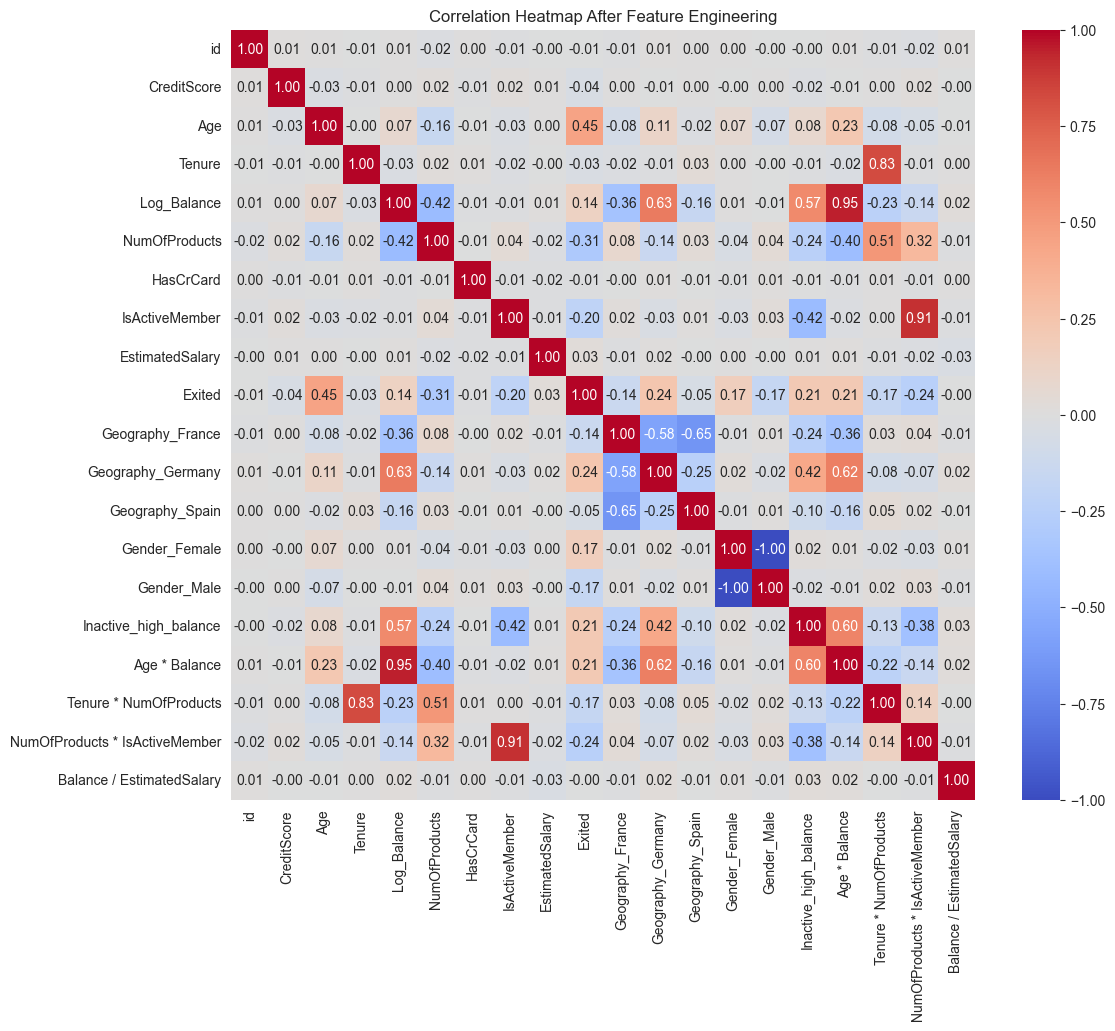

In [86]:
# Recompute correlation matrix
correlation_matrix = train_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap After Feature Engineering")
plt.show()

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sélectionner uniquement les colonnes numériques et exclure la variable cible
X = train_df.select_dtypes(include=[np.number]).drop(columns=['Exited'])

# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print("Variance Inflation Factor (VIF) pour chaque variable :")
print(vif_data.sort_values(by='VIF', ascending=False))


Variance Inflation Factor (VIF) pour chaque variable :
                           Feature        VIF
7                   IsActiveMember  19.341738
3                           Tenure  15.140971
10                   Age * Balance  13.433978
4                      Log_Balance  12.487288
12  NumOfProducts * IsActiveMember   9.501470
5                    NumOfProducts   6.919294
11          Tenure * NumOfProducts   4.846110
6                        HasCrCard   4.447252
0                               id   3.926704
9            Inactive_high_balance   2.621071
2                              Age   1.359027
1                      CreditScore   1.002432
13       Balance / EstimatedSalary   1.002129
8                  EstimatedSalary   1.001807
